Setup and Imports


# Section 1

In [17]:
from ansys.dpf import core as dpf
from pathlib import Path
import numpy as np
import pandas as pd
import pyvista

In [18]:

dpf.Model("bad_file.stp")

📂 Load Example Model

In [19]:
rst_path = Path(r"C:\DEV\Project2\data\file_test3.rst")

print(f"Loading model from: {rst_path}")	
model = dpf.Model(rst_path)



Loading model from: C:\DEV\Project2\data\file_test3.rst


📋 Model Summary

In [20]:
print("Summary")
print(model)

Summary
DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  plastic_strain: ElementalNodal  Plastic Strain
     -  element_orientations: ElementalNodal Element Euler Angles
     -  structural_temperature: ElementalNodal Structural temperature
------------------------------
DPF  Meshed Region: 
  139041 nodes 
  32000 elements 
  Unit: m 
  Wi

Unit

In [21]:
metadata = model.metadata
units_str = metadata.result_info.unit_system
disp_unit = units_str.split(":")[1].strip().split(", ")[0].lower()
print(f"Displecements unit: {disp_unit}")

Displecements unit: m


🧠 Metadata Extraction

In [22]:
metadata = model.metadata


# Mesh Info
print("=== Mesh Info ===")
print(metadata.meshed_region)

# Time/Frequency Info
print("=== Time/Frequency Info ===")
print(metadata.time_freq_support)


=== Mesh Info ===
DPF  Meshed Region: 
  139041 nodes 
  32000 elements 
  Unit: m 
  With solid (3D) elements
=== Time/Frequency Info ===
DPF  Time/Freq Support: 
  Number of sets: 4 
Cumulative     Time (s)       LoadStep       Substep         
1              0.200000       1              1               
2              0.400000       1              2               
3              0.700000       1              3               
4              1.000000       1              4               



In [23]:
# nodes number
mesh = metadata.meshed_region

num_nodes = len(mesh.nodes)
print(f"Number of nodes: {num_nodes}")

unit = mesh.unit
print(f"Unit: {unit}")




Number of nodes: 139041
Unit: m


In [24]:
# Node id

node_ids = np.array(mesh.nodes.scoping.ids)
print(node_ids)

[     1      2      3 ... 139039 139040 139041]


📊 Access and Display Displacement Results

In [25]:

print(rst_path)

C:\DEV\Project2\data\file_test3.rst


In [26]:

results = model.results
displacements = results.displacement()
fields = displacements.outputs.fields_container()

# Finally, extract the data of the displacement field:
disp = fields[0].data
disp

DPFArray([[ 1.73340642e-07,  1.73340642e-07,  3.04721883e-06],
          [ 1.73338670e-07,  1.73338670e-07,  3.12418705e-06],
          [ 1.92599952e-07,  1.73338571e-07,  3.12418469e-06],
          ...,
          [-1.92603061e-07, -1.54080237e-07,  3.00873541e-06],
          [-1.92603633e-07, -1.73341836e-07,  3.00873058e-06],
          [-1.92603797e-07, -1.92603797e-07,  3.00872670e-06]],
         shape=(139041, 3))

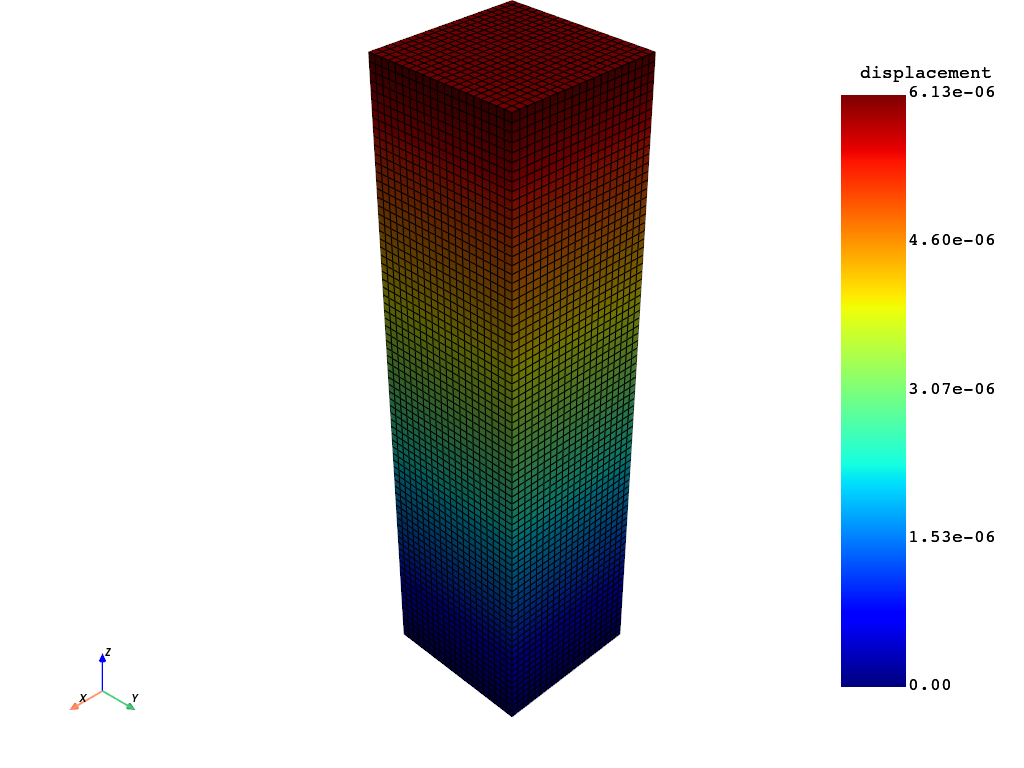

In [27]:

model.metadata.meshed_region.plot(fields)

Operators overview

🔹 Operators (methods)
Modular units like stress(), displacement(), add(), etc.

Connected like a data-flow graph.



Displecement

Wrapped operators

In [28]:
from ansys.dpf.core.operators.invariant import von_mises_eqv_fc
from ansys.dpf.core import operators

# Get the stress field container
stress_fc = model.results.stress().eval() 

#Use the von_mises_eqv_fc Operator
von_mises_op = operators.invariant.von_mises_eqv_fc()

# Connect the field container
von_mises_op.inputs.fields_container.connect(stress_fc)

# Run the operator
von_mises_fc = von_mises_op.outputs.fields_container()


# For example, print the first field (e.g., at the first time step)
print(von_mises_fc[0])


DPF stress_1.s_eqv Field
  Location: ElementalNodal
  Unit: Pa
  32000 entities 
  Data: 1 components and 256000 elementary data 

  Elemental
  IDs                   data(Pa)
  ------------          ----------
  801                   3.000238e+07   
                        3.000204e+07   
                        3.000235e+07   
                        ...

  802                   3.000237e+07   
                        3.000278e+07   
                        3.000235e+07   
                        ...

  803                   3.000196e+07   
                        3.000235e+07   
                        3.000200e+07   
                        ...

  ...




In [29]:
print(type(stress_fc))

<class 'ansys.dpf.core.fields_container.FieldsContainer'>


In [30]:
print(stress_fc)

DPF stress(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  4} with ElementalNodal location, 6 components and 32000 entities.



In [32]:
unit = von_mises_fc[0].unit
print(f"Unit: {unit}")

print(model.results.stress().eval().)

SyntaxError: invalid syntax (1725315231.py, line 4)

✅ with 1 field(s)
The container holds one field.

This usually means your simulation had only one time step or you’re currently only extracting one time slice.

✅ field 0 {time: 1}
This is the first field (index 0), associated with time step 1.


✅ ElementalNodal location
The stress values are stored at elemental-nodal locations:

This means the values are assigned to nodes within each element, not directly to global nodes or elements alone.

A node shared by two elements will have two different values, one per element.



✅ 6 components
Each stress tensor has 6 components: 

Sx,Sy,Sz,Sxy,Syz,Sxz (in Voigt notation).


✅ 64000 entities
There are 64000 elemental-nodal entries (i.e., stress tensors at element-node pairs).


In [ ]:
print(stress_fc[0])

DPF stress_1.s Field
  Location: ElementalNodal
  Unit: Pa
  32000 entities 
  Data: 6 components and 256000 elementary data 

  Elemental
  IDs                   data(Pa)
  ------------          ----------
  801                   2.479107e+01   2.479107e+01   3.000240e+07   -2.141906e+01  2.208437e+02   2.208437e+02   
                        2.278396e+01   2.278396e+01   3.000206e+07   -1.373009e+01  2.047944e+02   2.047944e+02   
                        -1.922761e+00  6.425316e+00   3.000236e+07   2.676415e+00   2.200323e+02   5.410285e+00   
                        ...

  802                   2.348693e+01   2.898844e+01   3.000240e+07   -2.312332e+01  2.203730e+02   2.209493e+02   
                        -4.830044e+00  4.382353e+00   3.000278e+07   6.460765e-01   2.387705e+02   6.537719e+00   
                        -4.590820e+00  4.784911e+00   3.000235e+07   8.940007e-01   2.202011e+02   5.298561e+00   
                        ...

  803                   1.801026e+01   7.8512

In [ ]:
stress_field = stress_fc[0].to_nodal()

stress_dt = stress_field.data
node_ids = stress_field.scoping.ids
stress_ar = np.column_stack((node_ids, stress_dt))


stress_ar

array([[ 1.40800000e+04,  2.54650874e+01,  2.54650874e+01, ...,
        -2.33396475e+01,  2.20925823e+02,  2.20925823e+02],
       [ 1.44410000e+04,  2.32985735e+01,  2.32985735e+01, ...,
        -1.54360425e+01,  2.04766191e+02,  2.04766191e+02],
       [ 3.52040000e+04, -3.22399521e+00,  5.61160970e+00, ...,
         1.77067986e+00,  2.19972366e+02,  5.34052539e+00],
       ...,
       [ 1.32779000e+05, -2.53029361e+00,  6.10343037e+01, ...,
        -1.67716731e+00, -3.94377781e+02, -7.73434627e+00],
       [ 1.32780000e+05, -3.14125631e+00,  4.60482088e+00, ...,
         1.80147953e+00, -2.44721930e+02, -7.34963179e+00],
       [ 1.31161000e+05, -3.91613650e+00, -3.91613650e+00, ...,
         1.43410686e+00, -7.42646217e+00, -7.42646229e+00]],
      shape=(139041, 7))

In [ ]:
vm_nodal = stress_fc[0].to_nodal()
node_ids = vm_nodal.scoping.ids
von_mises_values = vm_nodal.data

print(vm_nodal)

DPF stress_1.s Field
  Location: Nodal
  Unit: Pa
  139041 entities 
  Data: 6 components and 139041 elementary data 

  Nodal
  IDs                   data(Pa)
  ------------          ----------
  14080                 2.546509e+01   2.546509e+01   3.000240e+07   -2.333965e+01  2.209258e+02   2.209258e+02   
                        
  14441                 2.329857e+01   2.329857e+01   3.000206e+07   -1.543604e+01  2.047662e+02   2.047662e+02   
                        
  35204                 -3.223995e+00  5.611610e+00   3.000235e+07   1.770680e+00   2.199724e+02   5.340525e+00   
                        
  ...




compute_von_mises_per_node(model) – Summary


def compute_von_mises_per_node(model):
    stress_fc = model.results.stress().eval()
    vm_op = von_mises_eqv_fc()
    vm_op.inputs.fields_container.connect(stress_fc)
    vm_fc = vm_op.outputs.fields_container()
    vm_field = vm_fc[0]  # ElementalNodal
    vm_nodal = vm_field.to_nodal()
    node_ids = vm_nodal.scoping.ids
    von_mises_values = vm_nodal.data
    return np.column_stack((node_ids, von_mises_values))



This function computes Von Mises stress values per node from an Ansys DPF Model object.

🔧 Steps Performed:
Evaluate Stress
Retrieves stress results from the model as a FieldsContainer.

Compute Von Mises Stress
Uses the von_mises_eqv_fc operator to convert full stress tensors to scalar Von Mises values.

Extract Field
Takes the first result field from the Von Mises results (elemental-nodal data).

Convert to Nodal
Converts the stress values to nodal values (averaged if needed).

Retrieve Node IDs and Values

node_ids: IDs of the nodes in the model.

von_mises_values: Computed stress values at those nodes.

Return Combined Data
Returns a NumPy array with columns:

Column 1: Node IDs

Column 2: Von Mises stress values




Output Format:

[[node_id_1, von_mises_1],
 [node_id_2, von_mises_2],
 ...
]

# Section 2: Compute: Von Mises stress per node

In [ ]:
rst_path = Path("c:/Users/moham/OneDrive/Dokumente/demo/lastbasierte_prozessadaption/data/test2.rst")
model = dpf.Model(rst_path)

In [ ]:
results = model.results
print(results)

DPFServerException: ResultInfoProvider:645<-mapdl::rst::ResultInfoProvider:646<-TimeFreqSupportProvider:647<-mapdl::rst::TimeFreqSupportProvider:648<-mapdl::rst::TimeFreqSupportProvider<-Unable to open the following file: c:\Users\moham\OneDrive\Dokumente\demo\lastbasierte_prozessadaption\data\test2.rst, failed to read inputs of provider operator

In [ ]:
stress_fc = results.stress.eval()
print(stress_fc)

DPF stress(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with ElementalNodal location, 6 components and 64000 entities.



In [ ]:
# Instantiates the von_mises_eqv_fc operator, 
# which computes the Von Mises equivalent stress from stress fields.

vm_op = operators.invariant.von_mises_eqv_fc()

In [ ]:
# Connects the stress data to the Von Mises operator.
vm_op._inputs.fields_container.connect(stress_fc)

In [ ]:
# Executes the operator and retrieves the result: a FieldsContainer with Von Mises stress values 
# (still elemental-nodal).

vm_fc = vm_op.outputs.fields_container()

In [ ]:
#Extracts the first (and possibly only) field from the FieldsContainer.
vm_field = vm_fc[0]
print(vm_field)

# 64000 Element x 8 nodes per Element = 512000 nodes

DPF stress_1.s_eqv Field
  Location: ElementalNodal
  Unit: Pa
  64000 entities 
  Data: 1 components and 512000 elementary data 

  Elemental
  IDs                   data(Pa)
  ------------          ----------
  1                     1.294799e+06   
                        1.388578e+06   
                        1.484337e+06   
                        ...

  41                    1.297754e+06   
                        1.083278e+06   
                        1.164232e+06   
                        ...

  81                    1.085309e+06   
                        1.028708e+06   
                        1.109601e+06   
                        ...

  ...




In [ ]:
# Converts the data to purely nodal values, 
# often by averaging over elements that share each node.
vm_nodal = vm_field.to_nodal()

print(vm_nodal)

# we have exactly 270641

DPF stress_1.s_eqv Field
  Location: Nodal
  Unit: Pa
  270641 entities 
  Data: 1 components and 270641 elementary data 

  Nodal
  IDs                   data(Pa)
  ------------          ----------
  1                     1.207617e+06   
                        
  67244                 1.303514e+06   
                        
  67360                 1.399589e+06   
                        
  ...




In [ ]:
# Extracts the actual Von Mises stress values (as a NumPy array).
node_ids = vm_nodal.scoping.ids
von_mises_values = vm_nodal.data

vm_array = np.column_stack((node_ids, von_mises_values))
vm_array

array([[1.00000000e+00, 1.20761690e+06],
       [6.72440000e+04, 1.30351375e+06],
       [6.73600000e+04, 1.39958923e+06],
       ...,
       [2.57919000e+05, 7.49998553e+05],
       [2.57921000e+05, 7.49998588e+05],
       [2.57922000e+05, 7.50105992e+05]], shape=(270641, 2))

In [ ]:

vm_df = pd.DataFrame(vm_array, columns=["Node ID", "Von Mises Stress (Pa)"])

# Display the DataFrame
print(vm_df)

         Node ID  Von Mises Stress (Pa)
0            1.0           1.207617e+06
1        67244.0           1.303514e+06
2        67360.0           1.399589e+06
3        67362.0           1.303514e+06
4        60840.0           8.158307e+05
...          ...                    ...
270636  257923.0           7.500262e+05
270637  257924.0           7.500644e+05
270638  257919.0           7.499986e+05
270639  257921.0           7.499986e+05
270640  257922.0           7.501060e+05

[270641 rows x 2 columns]


# Section 3 Sclaing

In [ ]:
node_ids = np.array(mesh.nodes.scoping.ids)  # shape: (n_nodes,)
coordinates_field = mesh.nodes.coordinates_field
coordinates = coordinates_field.data
node_info = np.concatenate([node_ids.reshape(-1, 1), coordinates], axis=1)  # [NodeID, X, Y, Z]    
print(coordinates)

[[-0.0095   0.0005  -0.0085 ]
 [-0.0095   0.001   -0.0085 ]
 [-0.0095   0.0015  -0.0085 ]
 ...
 [-0.00825  0.      -0.009  ]
 [-0.00875  0.      -0.009  ]
 [-0.00925  0.      -0.009  ]]


In [ ]:
coordinates.shape

(270641, 3)

In [ ]:
x_min, y_min, z_min = np.min(coordinates, axis=0)
x_max, y_max, z_max = np.max(coordinates, axis=0)

print(f"X range: {x_min:.3f} to {x_max:.3f}")
print(f"Y range: {y_min:.3f} to {y_max:.3f}")
print(f"Z range: {z_min:.3f} to {z_max:.3f}")


X range: -0.010 to 0.010
Y range: 0.000 to 0.020
Z range: -0.009 to 0.011


In [ ]:
def get_unit_scale(unit: str) -> float:
    """
    Returns a scale factor to convert from the input unit to desired units.
    Example: 'm' to 'mm' returns 1000.
    """

    unit_scales = {
        "m": 1000.0,      # meters to millimeters
        "mm": 1.0,        # already in millimeters
        "cm": 10.0       # centimeters to millimeters
    }

    if unit not in unit_scales:
        raise ValueError(f"Unsupported unit '{unit}'. Add it to unit_scales if needed.")
    
    return unit_scales[unit]

In [ ]:
unit = model.metadata.meshed_region.unit.lower()
scale = get_unit_scale(unit)
scale

1000.0

Scale the data

In [ ]:
node_info[:, 0] # ids


array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 2.70639e+05,
       2.70640e+05, 2.70641e+05], shape=(270641,))

In [ ]:
# get coordinates
node_info[:, 1:]

array([[-0.0095 ,  0.0005 , -0.0085 ],
       [-0.0095 ,  0.001  , -0.0085 ],
       [-0.0095 ,  0.0015 , -0.0085 ],
       ...,
       [-0.00825,  0.     , -0.009  ],
       [-0.00875,  0.     , -0.009  ],
       [-0.00925,  0.     , -0.009  ]], shape=(270641, 3))

In [ ]:
x_min, y_min, z_min = np.min(node_info[:, 1:], axis=0)
x_max, y_max, z_max = np.max(node_info[:, 1:], axis=0)

print(f"X range: {x_min:.3f} to {x_max:.3f}")
print(f"Y range: {y_min:.3f} to {y_max:.3f}")
print(f"Z range: {z_min:.3f} to {z_max:.3f}")

X range: -0.010 to 0.010
Y range: 0.000 to 0.020
Z range: -0.009 to 0.011


In [ ]:
node_info[:, 1:4] *= scale

In [ ]:
x_min, y_min, z_min = np.min(node_info[:, 1:], axis=0)
x_max, y_max, z_max = np.max(node_info[:, 1:], axis=0)

print(f"X range: {x_min:.3f} to {x_max:.3f}")
print(f"Y range: {y_min:.3f} to {y_max:.3f}")
print(f"Z range: {z_min:.3f} to {z_max:.3f}")

X range: -10.000 to 10.000
Y range: 0.000 to 20.000
Z range: -9.000 to 11.000
